<font color=red> Complex Systems: From Physics to social sciences.

Jean-Philippe Bouchaud (lecturer), Valentina Ros (TDs) </font>


#  <font color=orange> HW1: </font>  FREQUENCY DISTRIBUTION OF WORDS IN LANGUAGES

**In this homework** we look at the emergence of Zipf's law in language. Zipf's law was made popular by the linguist G. K. Zipf, who theorised that given a long text, the frequency of each word is inversely proportional to its rank $r$:

 $$ f_ r \propto 1/r^ a $$

where $a$ is close to 1. This suggests that the most frequent word (having $r=1$) will occur approximately twice as often as the second most frequent word ($r=2$), which occurs twice as often as the fourth most frequent word, etc... We shall look at the emergence of power laws both in a real text (Ulysses by J. Joyce) and in random text. 

You'll find Ulysses as a txt file in the dropbox folder, but you may also download it using the link: http://www.gutenberg.org/files/4300/4300-0.txt

#  <font color=orange> Solved example: </font> Power laws in real language

We are going to check Zipf's law using the book Ulysses by J. Joyce. The book is given in the text file Ulisse.txt.

Let us first import some packages needed in the following:

In [1]:
#packages we need in the following
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import re 

import random
import string
import os
import math

**(Pt. 1)** As a first step, we have to prepare the data. To this aim, we have to define a function that: 

- processes the text by collecting all the words. 
  An example is given below. The command *re.findall(r'(\b[A-Za-z][a-z]{0,15}\b)', data)* is   asking
  to find (within 'data') all the words that start 
  with a letter (upper-case or lower-case) followed by a sequence of letters which consists
  of at least 0 characters and no more than 15 characters. 
  The size of the words that will be included in the output will range from 1 to 16 characters long.


- Counts the frequency with which a given word appears in the text.

*Solution:*

In [2]:
def get_wc_df(fname):
    with open(fname,'r') as f:
        data = f.read().replace('\n', ' ')
    words = re.findall(r'(\b[A-Za-z][a-z]{0,15}\b)', data)
    frequency  = {}
    for word in words:
        count = frequency.get(word,0)
        frequency[word] = count + 1
    df = pd.DataFrame(list(frequency.items()), columns=['Word', 'Frequency'])
    return df


---
---

**(Pt. 2)** Now let's appy this to Ulysses: call the function on the file 'Ulisse.txt', then order the resulting frequencies according to the rank $r$, from the most frequent word with $r=1$ to the less frequent one. Which are the most frequent words in Ulysses?

*Solution:*

In [4]:
df_ul = get_wc_df('Ulisse.txt')
df_ul['Rank'] = df_ul.Frequency.rank(ascending=False)


#most numerous words
print('Most numerous words in Ulysses')
df_ul.sort_values(by='Rank', inplace=True)

print(df_ul.head(10))


Most numerous words in Ulysses
    Word  Frequency  Rank
6    the      13682   1.0
11    of       8166   2.0
16   and       6690   3.0
9      a       5887   4.0
115   to       4871   5.0
79    in       4735   6.0
81   his       3063   7.0
267    I       2974   8.0
39    he       2970   9.0
121    s       2691  10.0


---
---

**(Pt. 3)** We are now ready to check Zipf's law. Given the frequencies of words ordered according to the rank (i.e., in decreasing order), plot the frequency vs rank distribution in log-log scale, to show that it is power-law. Plot also the function $1/x$ to compare and check that the exponent of the power law seems to be indeed very close to one.


[In the next homework, we will estimate the exponent using Maximum Likelihood]

*Solution:*

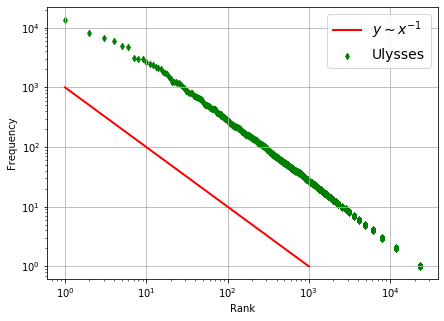

In [4]:
fig, ax = plt.subplots(figsize=(7,5))

df_ul.plot(x='Rank',y='Frequency', kind='scatter', ax=ax, label='Ulysses', color='green',marker='d')

## We plot the Zipf law x -> 1/x 
xs = np.logspace(0,3,10)
plt.plot(xs,1e3*xs**(-1), lw=2, color='red', label='$y\sim x^{-1}$')

## Figure in log-log scale
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.grid()

We now want to look at the distribution of the number of words as a function of their length [to compare with the case of random text, see below. This will be useful in TD1]. 
Using again the Ulysses, we want to determine:

- the frequency of the words with a given lenght 
- the number of *distinct* words of a given length. 

**(Pt. 4)** Write a function (similar to the one above) that computes the distribution  of words as a function of their length (i.e., how many times a word of a given length appears). Plot an histogram showing the fraction of words having a given length.

*Solution:*

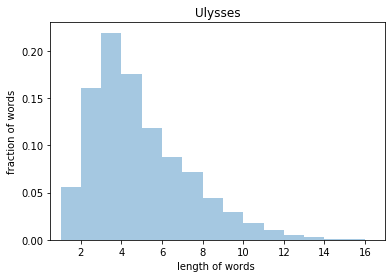

In [5]:
#for each word, table the length. Repetitions of words are included here
def get2_wc_df(fname):
    with open(fname,'r') as f:
        data = f.read().replace('\n', ' ')
    words = re.findall(r'(\b[A-Za-z][a-z]{0,15}\b)', data)
    ammo=[len(w) for w in words] 
    return ammo


#histogram of frequency of words -included repetitions - as a function of their length
data = get2_wc_df('Ulisse.txt')

# fixed bin size and range of the plot
bins=range(24)
plt.xlim([min(data)-.5, max(data)+1])

plt.hist(data, bins=bins, alpha=0.4, density=True)
plt.title('Ulysses')
plt.xlabel('length of words ')
plt.ylabel('fraction of words')

plt.show()

---
---

**(Pt. 5)** Now write a function that computes how many *distinct* words we have of a given length. Plot the resulting histogram. How does the fraction of distinct words increase with the length? Can we say that it increases exponentially? Plot the histogram in log scale to check. 


*Solution:*

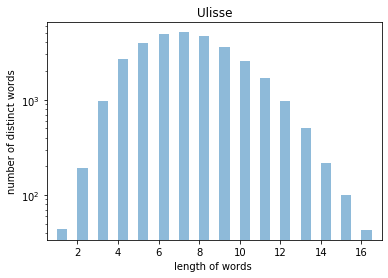

In [6]:
#takes the distinct words and gives the list of their length

def get3_wc_df(fname):
    with open(fname,'r') as f:
        data = f.read().replace('\n', ' ')
    words = re.findall(r'(\b[A-Za-z][a-z]{0,15}\b)', data)
    frequency  = {}
    for word in words:
        count = frequency.get(word,0)
        frequency[word] = count + 1
    pac = list(frequency.items())
    nuova= list();
    for pair in pac:
        nuova.append(len(pair[0]))
    return nuova

data = get3_wc_df('Ulisse.txt')

# fixed bin size and range of plot
bins = np.arange(-1, 25, .5)
plt.xlim([min(data)-.5, max(data)+1])


plt.hist(data, bins=bins, alpha=0.5)
plt.title('Ulisse')
plt.xlabel('length of words ')
plt.ylabel('number of distinct words')
plt.yscale('log')

plt.show()

# <font color=orange> Exercise: </font>  Power laws in random language

As an exercise, we want to reproduce the analysis above, but this time with a random text, where 'pseudo-words' 
are strings of letters appearing with equal probability, separated by a blank space [see Ex. 2 in TD1 for the analysis of this problem]. 

**(Pt. 6)** Generate a text file 'output_file.txt' which is composed by sequences of random length, of letters + the blank space. You may consider the simplest case in which each letter and the space appear with uniform probability. You can choose the total number of letters to use (let's call it *m*). For example, $m=8$ and the letter are chosen among the set $(a,b,c,d,e,f,g,h)$.

*Hint:*  to generate the strings, you may use a function such as:

In [15]:
def random_string():
    output = ''.join(random.choice('a'+'b'+'c'+'d'+'e'+'f'+'g'+'h'+' ') for x in range(10**8)) 
    return output

---
---

**(Pt. 7)** Do the rank- frequency plot in this case: what is the main difference with respect to the one obtained above? How does the exponent change as we change the number of letters $m$? Compare the power-law you get with the 
analytic estimate of the exponent [we will compute it in the TD1], that reads:


 <font color=black> $$\alpha(m)= \frac{\log (m+1)}{\log m}$$
</font>






---
---

**(Pt. 8)** Now look at the words of higher rank: do you see a pattern? Can you explain it? 

*Hint:* What is the probability to get a given word of length $L$, if the word is generated randomly as explained above?

---
---

**(Pt. 9)** Finally, we count the number of distinct words of a given length in our randomly generated text.  Plot the number of distinct pseudo-words as a function of their length (in log scale), and check that the distribution is exactly what you expect for this simple case (what do you expect?). Compare with the distribution we got for the non-random text above. What happens after a certain length? 